In [ ]:
!git clone "https://github.com/arubhasy/dataset.git"

Cloning into 'dataset'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 41 (delta 8), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (41/41), 1.32 MiB | 4.12 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from collections import Counter
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv('/content/dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [ ]:
df.shape

(768, 9)

<Axes: >

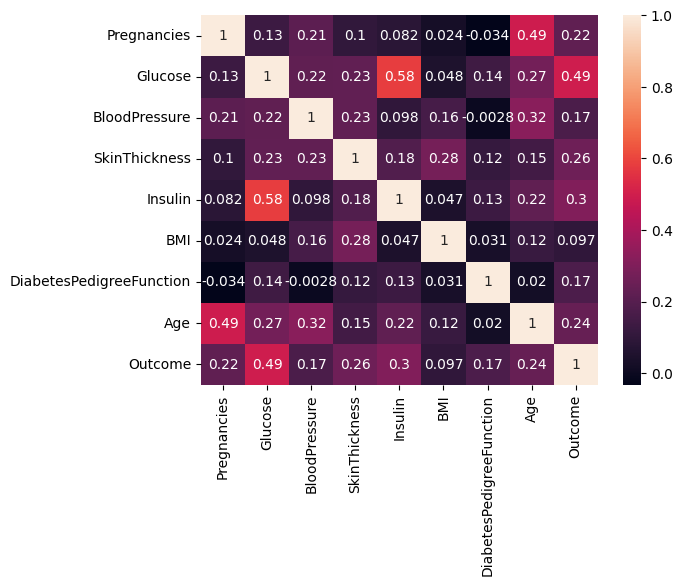

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
df_copy = df.copy(deep=True)
df_copy.drop(columns='BloodPressure', inplace=True)

In [ ]:
df_copy.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
x = df_copy.drop(columns='Outcome')
y = df_copy.Outcome

In [ ]:
from sklearn.impute import KNNImputer
knni = KNNImputer(n_neighbors=3)
x_imputed = knni.fit_transform(x)

In [ ]:
print('Original dataset shape %s' % Counter(y))
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x_imputed, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 500, 1: 268})
Resampled dataset shape Counter({1: 500, 0: 500})


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2)

accuracy score : 0.73
recall score : 0.7659574468085106
precision score : 0.6923076923076923
F1 score : 0.7272727272727273


<Axes: >

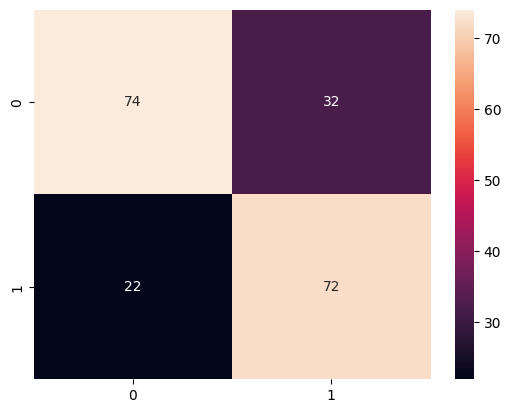

In [ ]:
dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=100, min_samples_split=2, min_samples_leaf=1)
rf = RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=200, min_samples_split=2, min_samples_leaf=1)

dt.fit(x_train, y_train)
rf.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)
y_pred_rf = rf.predict(x_test)

print(f'accuracy score : {accuracy_score(y_test, y_pred_dt)}')
print(f'recall score : {recall_score(y_test, y_pred_dt)}')
print(f'precision score : {precision_score(y_test, y_pred_dt)}')
print(f'F1 score : {f1_score(y_test, y_pred_dt)}')

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d')

accuracy score : 0.81
recall score : 0.851063829787234
precision score : 0.7692307692307693
F1 score : 0.8080808080808081


<Axes: >

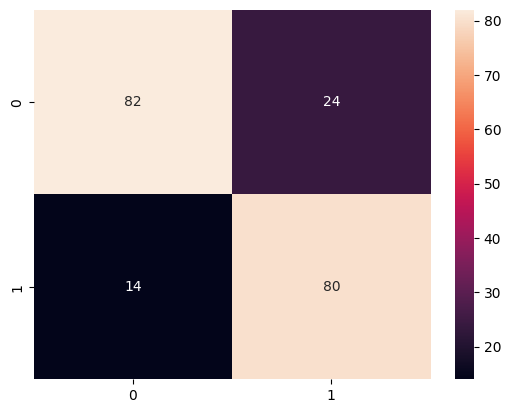

In [ ]:

print(f'accuracy score : {accuracy_score(y_test, y_pred_rf)}')
print(f'recall score : {recall_score(y_test, y_pred_rf)}')
print(f'precision score : {precision_score(y_test, y_pred_rf)}')
print(f'F1 score : {f1_score(y_test, y_pred_rf)}')
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,34.459577,29.371433,18.200,27.50000,32.3000,36.70000,497.00
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.631510,13.872991,21.000,24.00000,29.0000,41.00000,154.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


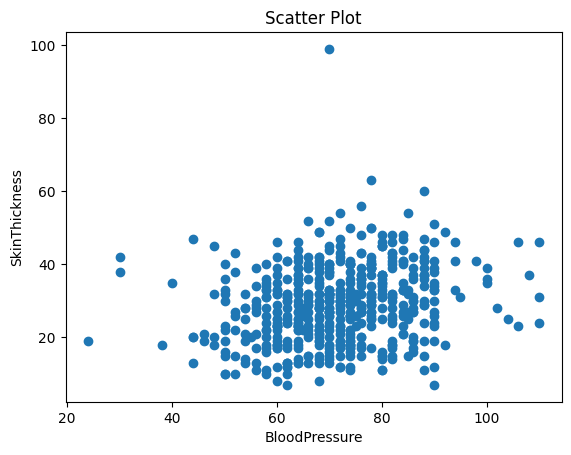

In [ ]:
plt.scatter(df['BloodPressure'], df['SkinThickness'])
plt.xlabel('BloodPressure')
plt.ylabel('SkinThickness')
plt.title('Scatter Plot')
plt.show()

In [ ]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

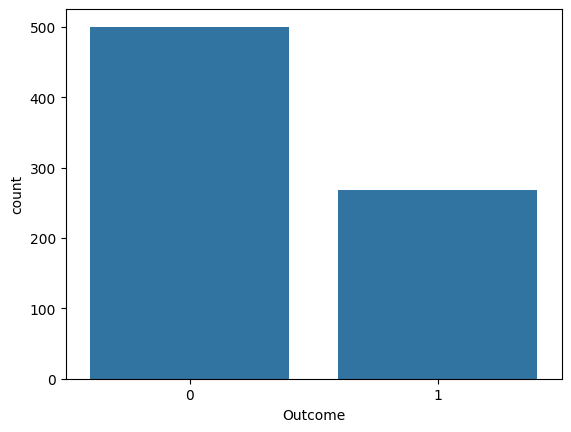

In [ ]:
sns.countplot(x=df.Outcome)

In [ ]:
col = df.drop(columns='Outcome').columns

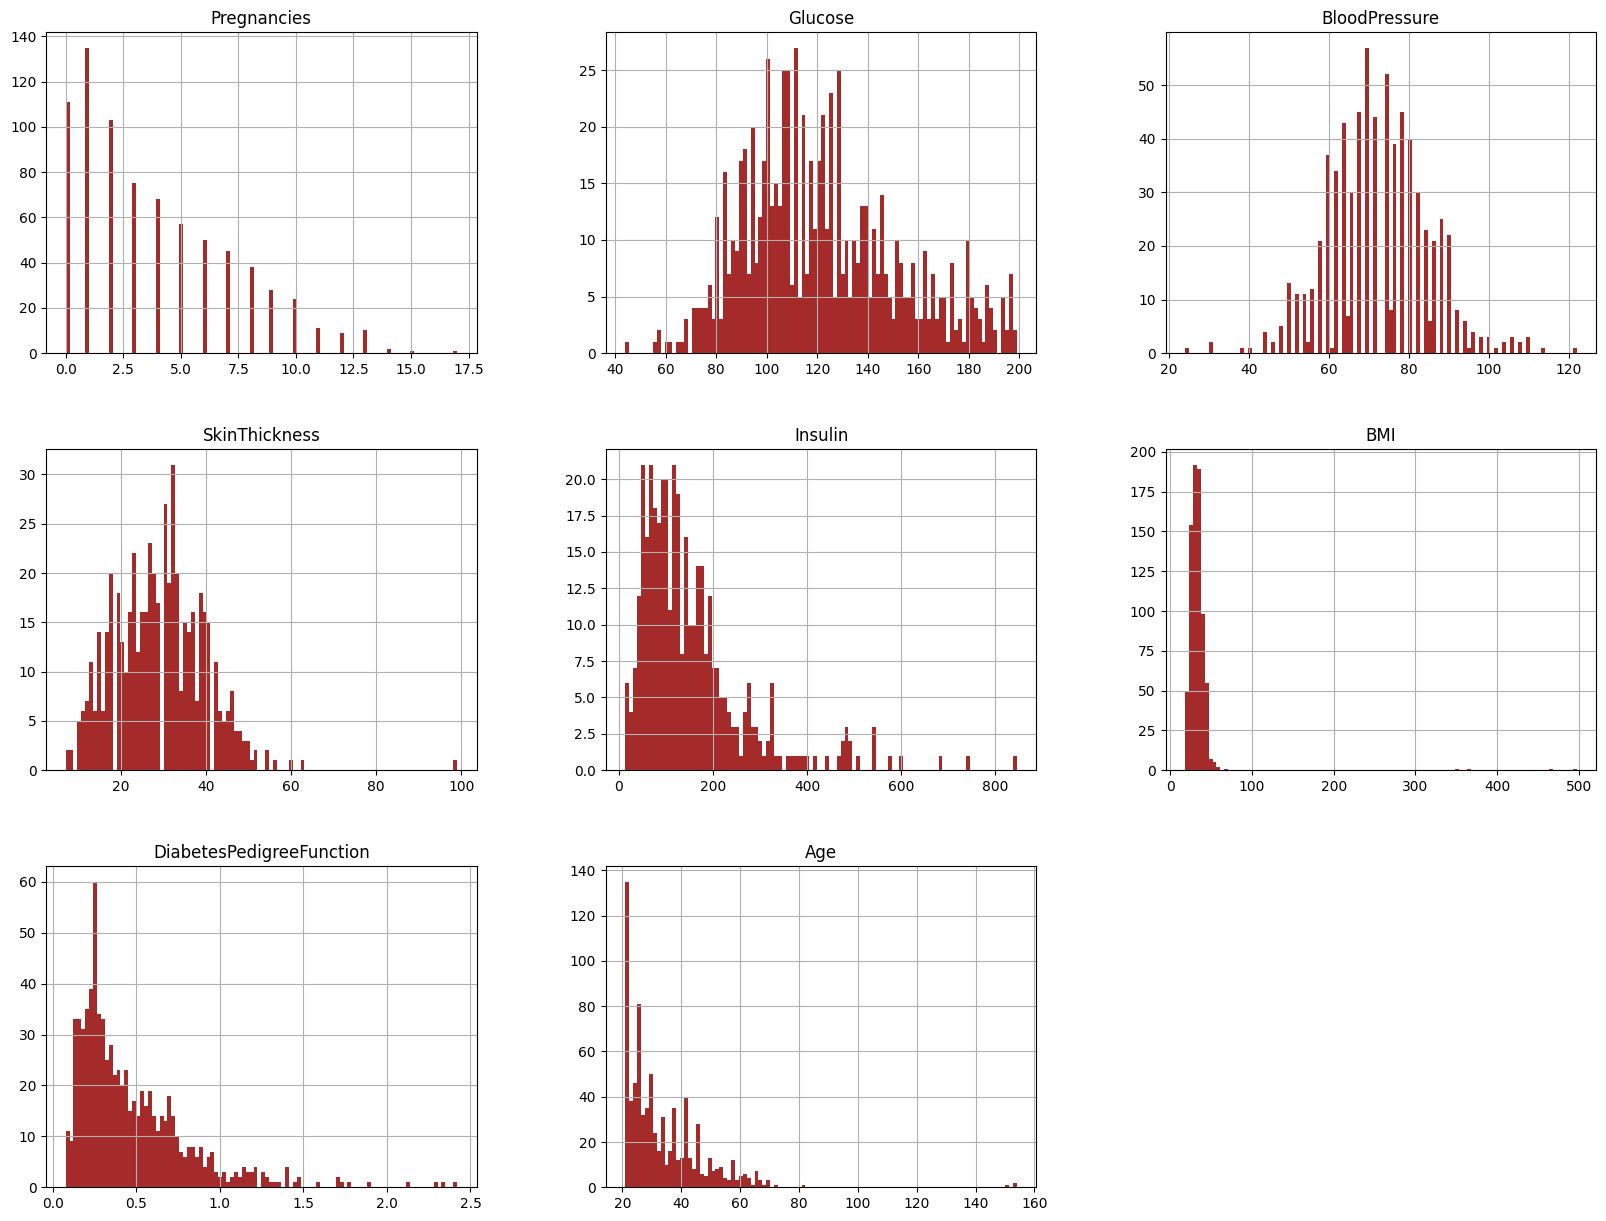

In [ ]:
df.hist(column=col, bins=100, figsize=(20, 15), color = 'brown');

In [ ]:
#df = df[~(df['Age']>=100)]

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
x = df.drop(columns='Outcome')
y = df.Outcome

In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
from sklearn.impute import KNNImputer
knni = KNNImputer(n_neighbors=3)
x_imputed = knni.fit_transform(x)

In [ ]:
x_imputed = pd.DataFrame(x_imputed, columns=x.columns)

In [ ]:
x_imputed.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [ ]:
print('Original dataset shape %s' % Counter(y))
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x_imputed, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 500, 1: 268})
Resampled dataset shape Counter({1: 500, 0: 500})


<Axes: xlabel='Outcome', ylabel='count'>

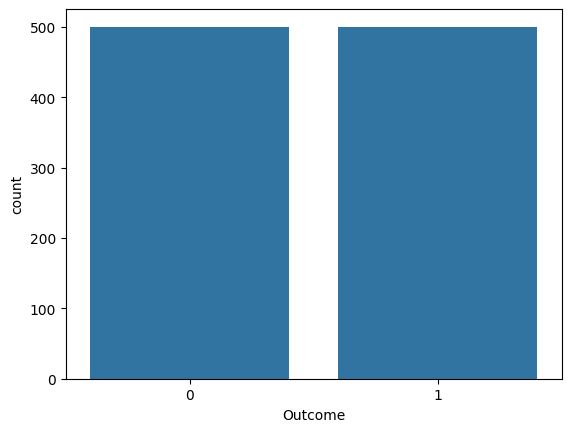

In [ ]:
sns.countplot(x=y_res)

In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_res = rs.fit_transform(X_res)
X_res = pd.DataFrame(X_res, columns=x.columns)

In [ ]:
X_res

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.600000,0.580416,-0.006340,0.416667,-0.142868,0.087330,0.610565,1.187500
1,-0.400000,-0.825977,-0.406340,-0.083333,-0.714341,-0.711771,-0.123091,0.000000
2,1.000000,1.361746,-0.539673,0.000000,0.535756,-1.088491,0.730183,0.062500
3,-0.400000,-0.736682,-0.406340,-0.583333,-0.448087,-0.540535,-0.612194,-0.625000
4,-0.600000,0.334855,-2.139673,0.416667,0.272748,1.171825,5.025791,0.125000
...,...,...,...,...,...,...,...,...
995,0.318047,0.973913,-0.486665,0.362467,0.791842,0.003996,-0.081267,0.086585
996,0.221481,-0.260319,-0.315969,0.507561,-0.086863,0.124494,-0.065876,-0.375000
997,-0.085091,1.191233,0.756811,-0.066818,0.166217,0.138078,1.408634,1.126363
998,1.124672,-0.231645,0.653153,0.224956,0.349321,0.152753,-0.300480,0.288960


# Pengujian pertama

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2)

dt = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=100, min_samples_split=2, min_samples_leaf=1)
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=100, min_samples_split=2, min_samples_leaf=1)

dt.fit(x_train, y_train)
rf.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)
y_pred_rf = rf.predict(x_test)

accuracy score : 0.755
recall score : 0.7938144329896907
precision score : 0.7264150943396226
F1 score : 0.7586206896551725


<Axes: >

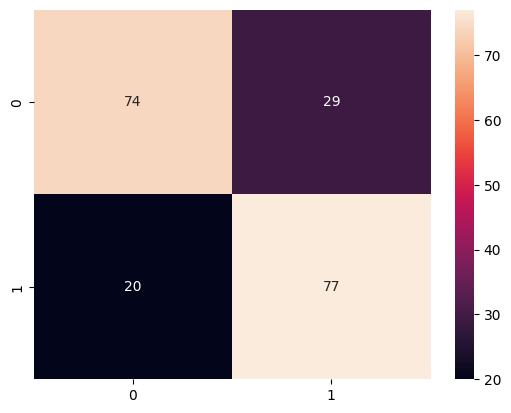

In [ ]:
print(f'accuracy score : {accuracy_score(y_test, y_pred_dt)}')
print(f'recall score : {recall_score(y_test, y_pred_dt)}')
print(f'precision score : {precision_score(y_test, y_pred_dt)}')
print(f'F1 score : {f1_score(y_test, y_pred_dt)}')

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d')

accuracy score : 0.81
recall score : 0.845360824742268
precision score : 0.780952380952381
F1 score : 0.8118811881188118


<Axes: >

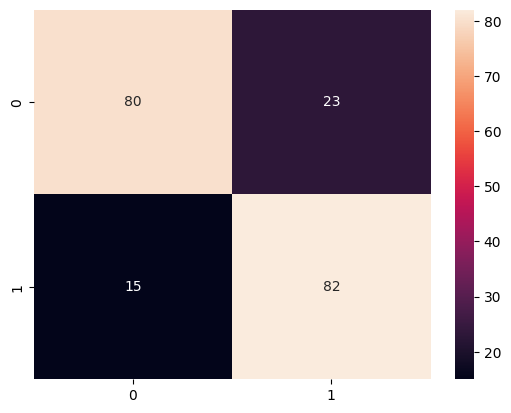

In [ ]:
print(f'accuracy score : {accuracy_score(y_test, y_pred_rf)}')
print(f'recall score : {recall_score(y_test, y_pred_rf)}')
print(f'precision score : {precision_score(y_test, y_pred_rf)}')
print(f'F1 score : {f1_score(y_test, y_pred_rf)}')
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')

# pengujian kedua

In [ ]:
dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=100, min_samples_split=2, min_samples_leaf=1)
rf = RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=200, min_samples_split=2, min_samples_leaf=1)

dt.fit(x_train, y_train)
rf.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)
y_pred_rf = rf.predict(x_test)

accuracy score : 0.725
recall score : 0.6701030927835051
precision score : 0.7386363636363636
F1 score : 0.7027027027027026


<Axes: >

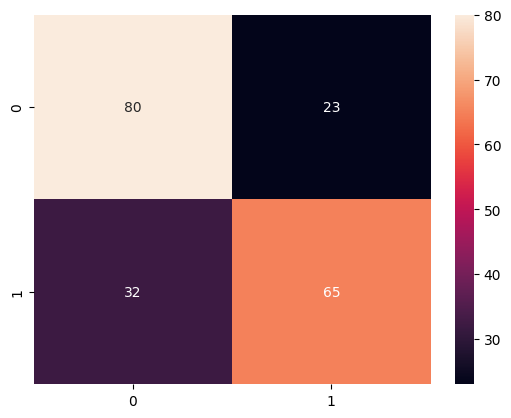

In [ ]:
print(f'accuracy score : {accuracy_score(y_test, y_pred_dt)}')
print(f'recall score : {recall_score(y_test, y_pred_dt)}')
print(f'precision score : {precision_score(y_test, y_pred_dt)}')
print(f'F1 score : {f1_score(y_test, y_pred_dt)}')

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d')

accuracy score : 0.815
recall score : 0.8247422680412371
precision score : 0.8
F1 score : 0.8121827411167513


<Axes: >

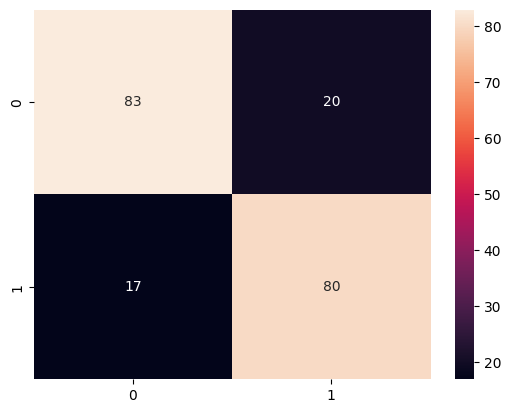

In [ ]:
print(f'accuracy score : {accuracy_score(y_test, y_pred_rf)}')
print(f'recall score : {recall_score(y_test, y_pred_rf)}')
print(f'precision score : {precision_score(y_test, y_pred_rf)}')
print(f'F1 score : {f1_score(y_test, y_pred_rf)}')
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')

In [ ]:
fitur_penting_dt = pd.DataFrame(dt.feature_importances_, columns=['Importance'], index=x.columns)
fitur_penting_dt

,Importance
Pregnancies,0.058406
Glucose,0.291555
BloodPressure,0.102063
SkinThickness,0.074553
Insulin,0.058614
BMI,0.181252
DiabetesPedigreeFunction,0.095710
Age,0.137847


In [ ]:
fitur_penting_rf = pd.DataFrame(rf.feature_importances_, columns=['Importance'], index=x.columns)
fitur_penting_rf

,Importance
Pregnancies,0.067890
Glucose,0.209455
BloodPressure,0.075151
SkinThickness,0.107142
Insulin,0.150082
BMI,0.153478
DiabetesPedigreeFunction,0.105512
Age,0.131290


In [ ]:
data = np.array([1,	87.0,	20.0,	35.0,	178.0,	23.1,	3.288,	53]).reshape(1, -1)
x_baru = pd.DataFrame(data, columns=x.columns)

In [ ]:
x_baru

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,87.0,20.0,35.0,178.0,23.1,3.288,53.0


In [ ]:
x_baru['predicted_outcome'] = dt.predict(x_baru)

In [ ]:
x_baru

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,predicted_outcome
0,1.0,87.0,20.0,35.0,178.0,23.1,3.288,53.0,0


In [ ]:
data = np.array([1,	57.0,	40.0,	85.0,	188.0,	23.1,	7.88,	23]).reshape(1, -1)
x_baru = pd.DataFrame(data, columns=x.columns)

In [ ]:
x_baru

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,57.0,40.0,85.0,188.0,23.1,7.88,23.0


In [ ]:
x_baru['predicted_outcome'] = rf.predict(x_baru)

In [ ]:
x_baru

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,predicted_outcome
0,1.0,57.0,40.0,85.0,188.0,23.1,7.88,23.0,1
